In [648]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from pathlib import Path

import pandas as pd
import numpy as np

In [796]:
random_state = 100

In [797]:
all_txt_files =[]
for file in Path("all_plus").rglob("*.txt"):
     all_txt_files.append(file.parent / file.name)
# counts the length of the list
all_docs = []
for txt_file in all_txt_files:
    with open(txt_file, encoding='utf-8') as f:
        txt_file_as_string = f.read()
    all_docs.append(txt_file_as_string)
    
print(len(all_docs))

75


In [798]:
exp_list = []
for i in range(1,16):
    exp_list.append(0)
for i in range(1,16):
    exp_list.append(1)
for i in range(1,16):
    exp_list.append(2)
for i in range(1,16):
    exp_list.append(3)
for i in range(1,16):
    exp_list.append(4)
    

In [799]:
d = {"text": all_docs, "label": exp_list}
df = pd.DataFrame(d)
df

,text,label
0,Әуе жолаушылары Еуроодақтың жаңа құқықтарын же...,0
1,Эфиопияның өсімдік шаруашылығы өнімі 24% артты...,0
2,Сот 280 миллиард долларлық темекіге қатысты іс...,0
3,Интернеттегі жарнаманы қалпына келтіру туралы ...,0
4,Индонезиялықтар жанармай бағасының көтерілуіне...,0
...,...,...
70,Сандық гуру суб - $ 100 дана\n\nMIT Media Labs...,4
71,Технология шығармашылық қатені алады\n\nЖоғары...,4
72,Wifi интернет Перуде фермерлерге жетеді\n\nСым...,4
73,Microsoft бамперлік патчаларды шығарады\n\nMic...,4


In [800]:
stop = ['маған', 'оған', 'саған', 'біздің', 'сіздің', 'оның', 'бізге', 'сізге', 'оларға', 'біздерге', 'сіздерге', 'оларға', 'менімен', 'сенімен', 'онымен', 'бізбен', 'сізбен', 'олармен', 'біздермен', 'сіздермен', 'менің', 'сенің', 'біздің', 'сіздің', 'оның', 'біздердің', 'сіздердің', 'олардың', 'маған', 'саған', 'оған', 'менен', 'сенен', 'одан', 'бізден', 'сізден', 'олардан', 'біздерден', 'сіздерден', 'олардан', 'айтпақшы', 'сонымен', 'сондықтан', 'бұл', 'осы', 'сол', 'анау', 'мынау', 'сонау', 'осынау', 'ана', 'мына', 'сона', 'әні', 'міне', 'өй', 'үйт', 'бүйт', 'біреу', 'кейбіреу', 'кейбір', 'қайсыбір', 'әрбір', 'бірнеше', 'бірдеме', 'бірнеше', 'әркім', 'әрне', 'әрқайсы', 'әрқалай', 'әлдекім','ах', 'ох', 'эх', 'ай', 'эй', 'ой', 'тағы', 'тағыда', 'әрине', 'жоқ', 'сондай', 'осындай', 'осылай', 'солай', 'мұндай', 'бұндай', 'мен', 'сен', 'ол', 'біз', 'біздер', 'олар', 'сіз', 'сіздер', 'әлдене', 'әлдеқайдан', 'әлденеше', 'әлдеқалай', 'әлдеқашан', 'алдақашан', 'еш', 'ешкім', 'ешбір', 'ештеме', 'дәнеңе', 'ешқашан', 'ешқандай', 'ешқайсы', 'емес', 'бәрі', 'барлық', 'барша', 'бар', 'күллі', 'бүкіл', 'түгел', 'өз', 'өзім', 'өзің', 'өзінің', 'өзіме', 'өзіне', 'өзімнің', 'өзі', 'өзге', 'менде', 'сенде', 'онда', 'менен', 'сенен\tонан', 'одан', 'ау', 'па', 'ей', 'әй', 'е', 'уа', 'уау', 'уай', 'я', 'пай', 'ә', 'о', 'оһо', 'ой', 'ие', 'аһа', 'ау', 'беу', 'мәссаған', 'бәрекелді', 'әттегенай', 'жаракімалла', 'масқарай', 'астапыралла', 'япырмай', 'ойпырмай', 'кәне', 'кәнеки', 'ал', 'әйда', 'кәні', 'міне', 'әні', 'сорап', 'қош-қош', 'пфша', 'пішә', 'құрау-құрау', 'шәйт', 'шек', 'моһ', 'тәк', 'құрау', 'құр', 'кә', 'кәһ', 'күшім', 'күшім', 'мышы', 'пырс', 'әукім', 'алақай', 'паһ-паһ', 'бәрекелді', 'ура', 'әттең', 'әттеген-ай', 'қап', 'түге', 'пішту', 'шіркін', 'алатау', 'пай-пай', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'арс', 'гүрс', 'дүрс', 'қорс', 'тарс', 'тырс', 'ырс', 'барқ', 'борт', 'күрт', 'кірт', 'морт', 'сарт', 'шырт', 'дүңк', 'күңк', 'қыңқ', 'мыңқ', 'маңқ', 'саңқ', 'шаңқ', 'шіңк', 'сыңқ', 'таңқ', 'тыңқ', 'ыңқ', 'болп', 'былп', 'жалп', 'желп', 'қолп', 'ірк', 'ырқ', 'сарт-сұрт', 'тарс-тұрс', 'арс-ұрс', 'жалт-жалт', 'жалт-жұлт', 'қалт-қалт', 'қалт-құлт', 'қаңқ-қаңқ', 'қаңқ-құңқ', 'шаңқ-шаңқ', 'шаңқ-шұңқ', 'арбаң-арбаң', 'бүгжең-бүгжең', 'арсалаң-арсалаң', 'ербелең-ербелең', 'батыр-бұтыр', 'далаң-далаң', 'тарбаң-тарбаң', 'қызараң-қызараң', 'қаңғыр-күңгір', 'қайқаң-құйқаң', 'митың-митың', 'салаң-сұлаң', 'ыржың-тыржың', 'бірақ', 'алайда', 'дегенмен', 'әйтпесе', 'әйткенмен', 'себебі', 'өйткені', 'сондықтан', 'үшін', 'сайын', 'сияқты', 'туралы', 'арқылы', 'бойы', 'бойымен', 'шамалы', 'шақты', 'қаралы', 'ғұрлы', 'ғұрлым', 'гөрі', 'бері', 'кейін', 'соң', 'бұрын', 'бетер', 'қатар', 'бірге', 'қоса', 'шейін', 'дейін', 'қарай', 'таман', 'салым', 'тарта', 'жуық', 'таяу', 'арнайы', 'осындай', 'ғана', 'қана', 'тек', 'әншейін', 'мен', 'да', 'бола', 'бір', 'де', 'сен', 'мені', 'сені', 'және', 'немесе', 'оны', 'еді', 'жатыр', 'деп', 'деді', 'тұр', 'тар', 'жаты', 'болып', ' ']
vec = TfidfVectorizer(analyzer="word", stop_words=stop,use_idf=True, smooth_idf=True, ngram_range=(1, 1))
vec.fit_transform(df.text.values)
features = vec.transform(df.text.values)

c:\users\zhastay\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['арбаң', 'арсалаң', 'батыр', 'бүгжең', 'бұтыр', 'далаң', 'ербелең', 'жалт', 'жұлт', 'күңгір', 'митың', 'онан', 'паһ', 'салаң', 'сұлаң', 'сұрт', 'тарбаң', 'тыржың', 'тұрс', 'шұңқ', 'ыржың', 'қайқаң', 'қалт', 'қаңғыр', 'қаңқ', 'қош', 'қызараң', 'құйқаң', 'құлт', 'құңқ', 'ұрс', 'әттеген'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


# Результаты

In [801]:
df_idf = pd.DataFrame(vec.idf_, index=vec.get_feature_names(),columns=["idf_weights"])
df_idf.sort_values(by=['idf_weights'], ascending=False)[0:20]

,idf_weights
өңірінен,4.637586
кінәсінен,4.637586
кінәлі,4.637586
кімнің,4.637586
кіммен,4.637586
технологияның,4.637586
кілт,4.637586
кілемнің,4.637586
кэти,4.637586
кэррролл,4.637586


In [802]:
features

<75x7362 sparse matrix of type '<class 'numpy.float64'>'
	with 18222 stored elements in Compressed Sparse Row format>

In [851]:
pd.DataFrame(features[i].T.todense(), index=vec.get_feature_names(), columns=["tfidf", "11"]).sort_values(by=["tfidf"],ascending=False)[:5]

TypeError: __init__() got multiple values for argument 'index'

In [857]:
tdf = []
for i in range(75):
    expp = pd.DataFrame(features[i].T.todense(), index=vec.get_feature_names(), columns=["tfidf"]).sort_values(by=["tfidf"],ascending=False)[:5]
    expp['doc_id'] = [i, i, i, i, i]
    tdf.append(expp)

dfnw = pd.concat(tdf)

In [858]:
dfnw

,tfidf,doc_id
әуе,0.340310,0
авиакомпаниялар,0.297771,0
еуропалық,0.229939,0
өтемақы,0.164254,0
жолаушыларға,0.162308,0
...,...,...
электрондық,0.361258,74
вирус,0.334164,74
рождестволық,0.214512,74
пошта,0.204002,74


In [804]:
N = 20

idx = np.ravel(features.sum(axis=0).argsort(axis=1))[::1][:N]

top_10_words = np.array(vec.get_feature_names())[idx].tolist()

top_10_words

['tandy',
 'пультін',
 'пульті',
 'псиондық',
 'toshiba',
 'компьютерлердің',
 'анықтауға',
 'практикалық',
 'бөлшектерге',
 'эльзенер',
 'алынбалы',
 'консерві',
 'плеері',
 'плеерлер',
 'плеерді',
 'пультіне',
 'плеер',
 'бәлкім',
 'перспективаның',
 'электроникаға']

In [830]:
features[0]

<75x7362 sparse matrix of type '<class 'numpy.float64'>'
	with 18222 stored elements in Compressed Sparse Row format>

In [805]:
features[0]
np.ravel(features.sum(axis=0).argsort(axis=1))[::1][:N]

array([ 392, 4468, 4467, 4466,  407, 3196,  728, 4422, 1515, 6286,  664,
       3207, 4394, 4393, 4392, 4469, 4391, 1488, 4370, 6279], dtype=int64)

# Кластеризация

In [807]:
cls = KMeans(
    n_clusters=num_clusters,
    random_state=random_state
)
cls.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [808]:
cls.predict(features)
cls.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4])

In [809]:
pca = PCA(n_components=pca_num_components, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

reduced_cluster_centers = pca.transform(cls.cluster_centers_)

In [810]:
centroids  = cls.cluster_centers_
samplesCentroids = centroids[cls.labels_]

In [811]:
centoides = pd.DataFrame(centroids)
centoides

,0,1,2,3,4,5,6,7,8,9,...,7352,7353,7354,7355,7356,7357,7358,7359,7360,7361
0,0.000000,0.003984,0.003466,0.000000,0.007136,0.000000,0.000000,0.013990,0.013723,0.002705,...,0.000000,0.003388,0.000000,0.000000,0.000000,0.000000,0.000000,0.003092,0.000000,0.000000
1,0.033277,0.000000,0.000000,0.000000,0.000000,0.000000,0.003288,0.006060,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.009109,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010085,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.006251,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003890,0.005229,0.000000,...,0.000000,0.003846,0.000000,0.004241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.015603,0.000000,0.000000,0.004892,0.000000,0.004892,0.000000,0.005205,0.017223,0.003423,...,0.003208,0.004160,0.013832,0.000000,0.002944,0.018907,0.002944,0.000000,0.020257,0.003337


In [812]:
np.sum(centoides[1:2].values)

13.24929739436274

In [813]:
def calcul(doc, centoides):
    alllist = []
    for i in range(len(centoides)):
        docslist = []
        for j in range(len(doc)):
            sq = np.sum((doc[j:(j+1)].values - centoides[i:(i+1)].values)**2)
            docslist.append(sq)
        alllist.append(docslist)
        
    numpy_array = np.array(alllist)
    transpose = numpy_array.T

    transpose_list = transpose.tolist()
    return pd.DataFrame(transpose_list)

In [814]:
docci = pd.DataFrame(features.toarray())

In [815]:
calcula = calcul(docci, centoides)

In [816]:
df

,text,label
0,Әуе жолаушылары Еуроодақтың жаңа құқықтарын же...,0
1,Эфиопияның өсімдік шаруашылығы өнімі 24% артты...,0
2,Сот 280 миллиард долларлық темекіге қатысты іс...,0
3,Интернеттегі жарнаманы қалпына келтіру туралы ...,0
4,Индонезиялықтар жанармай бағасының көтерілуіне...,0
...,...,...
70,Сандық гуру суб - $ 100 дана\n\nMIT Media Labs...,4
71,Технология шығармашылық қатені алады\n\nЖоғары...,4
72,Wifi интернет Перуде фермерлерге жетеді\n\nСым...,4
73,Microsoft бамперлік патчаларды шығарады\n\nMic...,4


In [817]:
df['Centroid1'] = calcula[0]
df['Centroid2'] = calcula[1]
df['Centroid3'] = calcula[2]
df['Centroid4'] = calcula[3]
df['Centroid5'] = calcula[4]
df

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5
0,Әуе жолаушылары Еуроодақтың жаңа құқықтарын же...,0,1.157348,0.877367,1.165989,1.092745,1.059361
1,Эфиопияның өсімдік шаруашылығы өнімі 24% артты...,0,1.172296,0.820186,1.177331,1.142475,1.078015
2,Сот 280 миллиард долларлық темекіге қатысты іс...,0,1.175895,0.756564,1.156773,1.129790,1.087047
3,Интернеттегі жарнаманы қалпына келтіру туралы ...,0,1.158482,0.773286,1.158434,1.133274,1.077521
4,Индонезиялықтар жанармай бағасының көтерілуіне...,0,1.153948,0.770475,1.163173,1.113896,1.086388
...,...,...,...,...,...,...,...
70,Сандық гуру суб - $ 100 дана\n\nMIT Media Labs...,4,1.151534,1.127765,1.150822,1.106545,0.865058
71,Технология шығармашылық қатені алады\n\nЖоғары...,4,1.138077,1.125567,1.138381,1.114089,0.859135
72,Wifi интернет Перуде фермерлерге жетеді\n\nСым...,4,1.138216,1.098167,1.146841,1.101944,0.847547
73,Microsoft бамперлік патчаларды шығарады\n\nMic...,4,1.171330,1.126250,1.176452,1.114048,0.783027


# Определение точности кластеризации

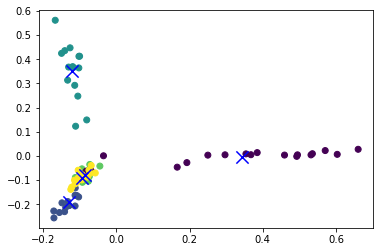

In [818]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [819]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df.label, cls.predict(features))

0.9169925998216003

In [820]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.053310857985372544

# Проверька данных

In [821]:
df['predic_label'] = cls.labels_

In [822]:
df[:15]

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
0,Әуе жолаушылары Еуроодақтың жаңа құқықтарын же...,0,1.157348,0.877367,1.165989,1.092745,1.059361,1
1,Эфиопияның өсімдік шаруашылығы өнімі 24% артты...,0,1.172296,0.820186,1.177331,1.142475,1.078015,1
2,Сот 280 миллиард долларлық темекіге қатысты іс...,0,1.175895,0.756564,1.156773,1.129790,1.087047,1
3,Интернеттегі жарнаманы қалпына келтіру туралы ...,0,1.158482,0.773286,1.158434,1.133274,1.077521,1
4,Индонезиялықтар жанармай бағасының көтерілуіне...,0,1.153948,0.770475,1.163173,1.113896,1.086388,1
5,Peugeot мәмілесі Mitsubishi-ны арттырады\n\nЖа...,0,1.159562,0.850105,1.165100,1.131590,1.095079,1
6,Телеграф газеттерінде 90 жұмыс бар\n\nDaily жә...,0,1.157948,0.946604,1.161706,1.122297,1.087577,1
7,Жарнамалық сату Time Warner-дің пайдасын артты...,0,1.159269,0.787504,1.143600,1.118875,1.074311,1
8,Гринспан тілінде доллар пайдасы\n\nФедералды р...,0,1.150163,0.789772,1.144167,1.115682,1.078460,1
9,ЮКОС қондырғысын сатып алушы қарызға шағымдана...,0,1.173892,0.736371,1.163547,1.122054,1.088066,1


In [823]:
df[15:30]

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
15,Mutant кітабы Guardian сыйлығын алады\n\nМутан...,1,1.149981,1.140255,0.630087,1.125360,1.100197,2
16,Да Винчи коды - «жаман тарих»\n\nРождестволық ...,1,1.162197,1.138020,0.808210,1.119699,1.100893,2
17,Уганда «Вагина монологтарына» тыйым салады\n\n...,1,1.169983,1.149486,0.935923,1.097337,1.104844,2
18,Сатушылардағы құпия ашық хаттар\n\nДамиен Хирс...,1,1.153929,1.136435,0.919917,1.128868,1.099204,2
19,Неесон театрды жандандыруға ұсыныс жасады\n\nГ...,1,1.135509,1.132976,0.840861,1.076492,1.092144,2
20,Леви Whitbread романының жүлдесін алады\n\nҚыз...,1,1.135354,1.129422,0.777579,1.121999,1.096597,2
21,Приключения ертегілері марапаттарға ие\n\nКіта...,1,1.142706,1.142850,0.728280,1.120629,1.104496,2
22,Галерея интерактивті ағашты ұсынады\n\nМәтінді...,1,1.168351,1.139853,0.744499,1.147995,1.106780,2
23,Джар ертегі мерекесіне қосылды\n\nФранцуз музы...,1,1.154458,1.140172,0.787571,1.136955,1.108216,2
24,Капра фильміне музыкалық емдеу\n\nКлассикалық ...,1,1.157669,1.134253,0.779658,1.120331,1.115932,2


In [824]:
df[30:45]

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
30,Гибралтар қаласының болашағы туралы келіссөзде...,2,1.165709,1.148299,1.180082,0.840572,1.106725,3
31,Кэмпбелл: Электрондық пошта қатары «ақымақ»\n\...,2,1.162674,1.138334,1.153963,0.838145,1.074347,3
32,Супер-казиноларға қатысты маңызды шешім\n\nВес...,2,1.140123,1.130809,1.164134,0.791772,1.074579,3
33,Ховард ханым сайлаудың негізгі рөлін алады\n\n...,2,1.138607,1.128021,1.135186,0.697676,1.086898,3
34,Премьер түрмелерден кешірім сұрады\n\nТони Блэ...,2,1.125589,1.131582,1.128057,0.752204,1.090699,3
35,Ховард баспанаға қатысты сындарды қайтарады\n\...,2,1.156592,1.143561,1.142226,0.820300,1.088005,3
36,Блэр Tory террорлық ұсынысын қабылдамайды\n\nТ...,2,1.150827,1.128174,1.163725,0.827863,1.062652,3
37,Еңбек декреттік жалақыны көтеруді жоспарлайды\...,2,1.030259,1.123087,1.160140,1.076838,1.089077,0
38,Бақылау қызметі электрондық поштаны жоюды текс...,2,1.161248,1.123048,1.167991,0.882055,1.051336,3
39,Хьюитт «мансаптық сексизмді» қабылдамайды\n\nЛ...,2,1.021109,1.107468,1.138984,1.036454,1.070206,0


In [825]:
df[45:60]

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
45,Ұлыбританияда жеңіл атлетикадан Жаңа интернет ...,3,0.897362,1.125672,1.164515,1.111764,1.083901,0
46,Жеңіс үшін түссіз бағбан дауыл\n\nБритандық Дж...,3,0.699143,1.120826,1.136007,1.111065,1.098272,0
47,Коллинз Бирмингемде жарысады\n\n100 метрге жүг...,3,0.635805,1.143845,1.139590,1.120345,1.090707,0
48,Рэдклиффу әлі қоңырауға жауап береді\n\nПауле ...,3,0.582138,1.111763,1.121994,1.082857,1.075122,0
49,"Эдвардс советов, Еуроға Идову-алтын\n\nӘлем ре...",3,0.766161,1.133910,1.135904,1.106900,1.094111,0
50,Кения Чепкемей аспасын көтереді\n\nКениялық же...,3,0.900547,1.137816,1.168231,1.124465,1.109288,0
51,Макилрой нацелился на чемпионы Мадрид\n\nСолтү...,3,0.804659,1.125873,1.132152,1.099741,1.097539,0
52,Клакстон аң бірінші ірі медаль\n\nБритандық ба...,3,0.858251,1.144248,1.157324,1.133789,1.115297,0
53,О ' Салливан әлем бойынша жүгіре алды\n\nСоня ...,3,0.677519,1.125006,1.140742,1.110120,1.092158,0
54,Грин әлем чемпионы атағына таласады\nЖаңа Зела...,3,0.761006,1.130290,1.141943,1.122598,1.100525,0


In [826]:
df[60:75]

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
60,Xbox 'fire fear'Қуат кабелі\n\nMicrosoft қауіп...,4,1.168059,1.121230,1.162933,1.129806,0.818509,4
61,"Apple Ноутбук-бұл "" ең үлкен гаджет""\n\nApple ...",4,1.017214,1.126829,1.123205,1.112216,1.032529,0
62,Google құралдар тақтасы алаңдаушылық тудырады\...,4,1.181958,1.111768,1.181869,1.123007,0.873312,4
63,ТВ жүктеуді жүргізетін Ұлыбританияның технолог...,4,1.133105,1.107790,1.149652,1.102304,0.875613,4
64,IBM компаниясы Linux пуш ақша салады\n\nIBM ке...,4,1.169442,1.117736,1.171138,1.132912,0.800738,4
65,Британдық пионерлер сандық кино\n\nӘлемдегі бі...,4,1.132093,1.133760,1.160399,1.099576,0.863961,4
66,ЕО бағдарламалық қамтамасыз етуге патенттік құ...,4,1.174629,1.123072,1.178972,1.083074,0.788262,4
67,Сия көмектеседі басқару демократиясы Азия\n\nҚ...,4,1.156643,1.113383,1.163458,1.101637,0.841314,4
68,Қытай таза мәдениет кафе разгон\n\nҚытай биліг...,4,1.164806,1.115488,1.164215,1.130156,0.923954,4
69,Microsoft троян іздейді\n\nMicrosoft фирманың ...,4,1.203428,1.158230,1.197189,1.142872,0.853070,4


In [829]:
df

,text,label,Centroid1,Centroid2,Centroid3,Centroid4,Centroid5,predic_label
0,Әуе жолаушылары Еуроодақтың жаңа құқықтарын же...,0,1.157348,0.877367,1.165989,1.092745,1.059361,1
1,Эфиопияның өсімдік шаруашылығы өнімі 24% артты...,0,1.172296,0.820186,1.177331,1.142475,1.078015,1
2,Сот 280 миллиард долларлық темекіге қатысты іс...,0,1.175895,0.756564,1.156773,1.129790,1.087047,1
3,Интернеттегі жарнаманы қалпына келтіру туралы ...,0,1.158482,0.773286,1.158434,1.133274,1.077521,1
4,Индонезиялықтар жанармай бағасының көтерілуіне...,0,1.153948,0.770475,1.163173,1.113896,1.086388,1
...,...,...,...,...,...,...,...,...
70,Сандық гуру суб - $ 100 дана\n\nMIT Media Labs...,4,1.151534,1.127765,1.150822,1.106545,0.865058,4
71,Технология шығармашылық қатені алады\n\nЖоғары...,4,1.138077,1.125567,1.138381,1.114089,0.859135,4
72,Wifi интернет Перуде фермерлерге жетеді\n\nСым...,4,1.138216,1.098167,1.146841,1.101944,0.847547,4
73,Microsoft бамперлік патчаларды шығарады\n\nMic...,4,1.171330,1.126250,1.176452,1.114048,0.783027,4
